In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, regularizers, callbacks
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins

2022-11-17 09:10:10.099702: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
penguins = load_penguins()
penguins.dropna(inplace=True)
penguins.drop(columns='year', inplace=True)
X = penguins.drop(columns='sex')
y = penguins['sex']

In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
preproc = make_column_transformer(
			(StandardScaler(), make_column_selector(dtype_exclude='object')),
			(OneHotEncoder(handle_unknown='ignore', sparse=False), 
				    make_column_selector(dtype_include='object'))
		    )

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

preproc.fit(X_train)
X_train_preproc = preproc.transform(X_train)
X_test_preproc = preproc.transform(X_test)
X_test_preproc.shape

(200, 10)

In [6]:
def init_mod(model, opt):
    
    model.add(layers.Dense(16, activation='relu', input_dim=10))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [7]:
def fit_mod(model, n_epochs=300):
    
    es = callbacks.EarlyStopping(patience=20)

    history = model.fit(X_train_preproc, y_train, 
                        batch_size=16, epochs=n_epochs,
                        validation_split=0.3,
                        callbacks=[es], verbose=0)
    
    return history

In [8]:
model = Sequential()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model = init_mod(model, opt)

history = fit_mod(model, n_epochs=150)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


2022-11-17 09:10:28.869647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None


In [9]:
model.evaluate(X_test_preproc, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9250


[0.2104375958442688, 0.925000011920929]

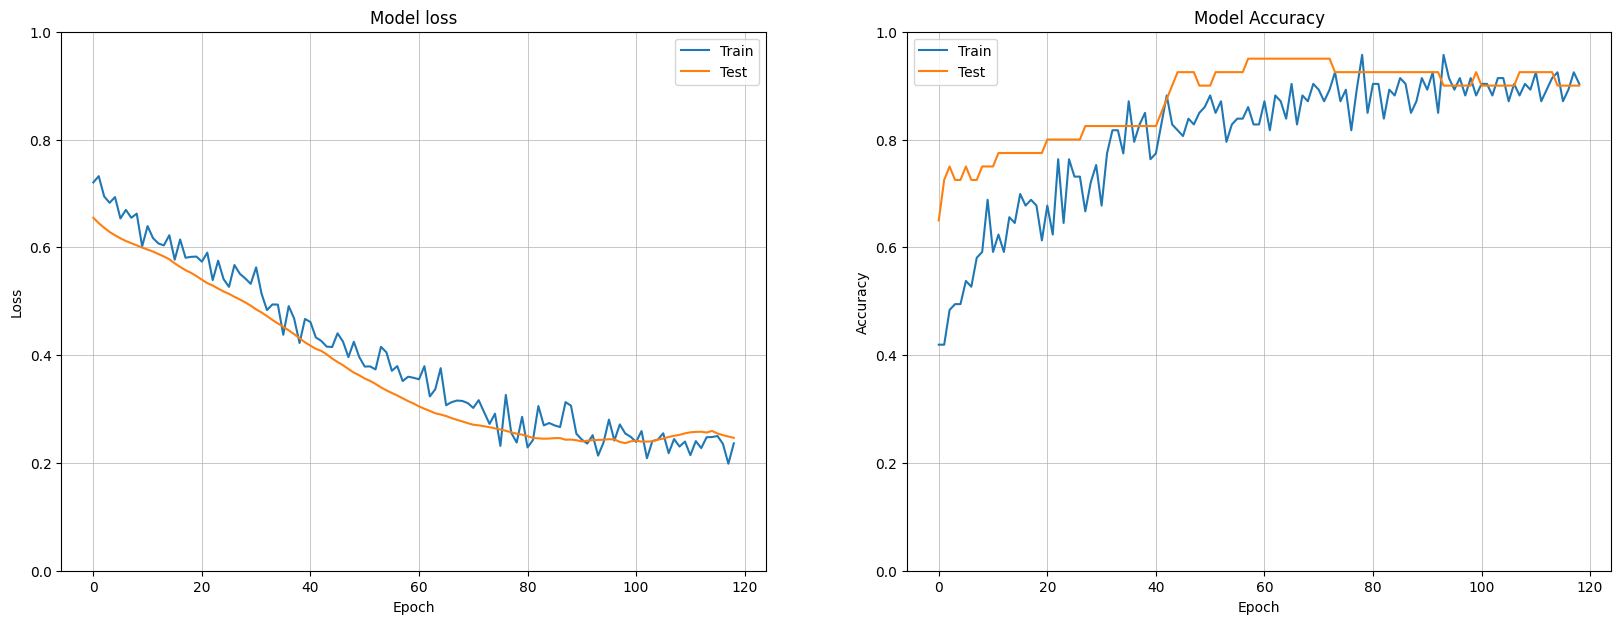

In [10]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,1))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

plot_loss_accuracy(history)
plt.show();